### **1. Introduction & Objective**
   - **Purpose of the Analysis**:Predicting bankruptcy occurrence in the future using financial data
   - **Dataset Description**: This dataset contains various financial indicators that help determine whether a company is at risk of bankruptcy.

### **2. Import Libraries**
   - Always import all necessary libraries at the beginning of the notebook for easy reference and to ensure consistency throughout the analysis.


In [401]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import plotly.express as px
import plotly.graph_objects as go


In [402]:
data


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


### **3. Load the Dataset**
   - Load the dataset using pandas or other tools and display basic information about it.
   - **Preview the first few rows** of the dataset to understand its structure.


In [403]:
# Load the dataset
file_path = 'bankruptcy-prevention.csv'  # Replace with your dataset's file path
data = pd.read_excel("bankruptcy-prevention (1) (1).xlsx")

# Display dataset information (Optional)
data.head()


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [404]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6   class                   250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [405]:
data.duplicated().sum()


147

In [406]:
data.drop_duplicates(inplace=True)


In [407]:
data["class"].value_counts()


class
non-bankruptcy    78
bankruptcy        25
Name: count, dtype: int64

In [408]:
data.count()


industrial_risk           103
 management_risk          103
 financial_flexibility    103
 credibility              103
 competitiveness          103
 operating_risk           103
class                     103
dtype: int64

In [409]:
data.isnull().sum()


industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
class                     0
dtype: int64

In [410]:
data.describe()


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,0.485437,0.563107,0.504854,0.582524,0.640777,0.514563
std,0.404971,0.412308,0.405206,0.377668,0.410747,0.439788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **4 Exploratory Data Analysis (EDA):** 
- Descriptive Statistics: Get a sense of the central tendency, spread, and shape of the dataset.
- Data Visualizations: Visualize key relationships in the data to understand the distribution and any potential patterns.
- Histograms for feature distributions.
- Correlation heatmaps to see relationships between features.
- Pair plots, bar charts, and box plots for categorical and continuous data relationships.

array([[<Axes: title={'center': 'industrial_risk'}>,
        <Axes: title={'center': ' management_risk'}>],
       [<Axes: title={'center': ' financial_flexibility'}>,
        <Axes: title={'center': ' credibility'}>],
       [<Axes: title={'center': ' competitiveness'}>,
        <Axes: title={'center': ' operating_risk'}>]], dtype=object)

<Figure size 640x480 with 0 Axes>

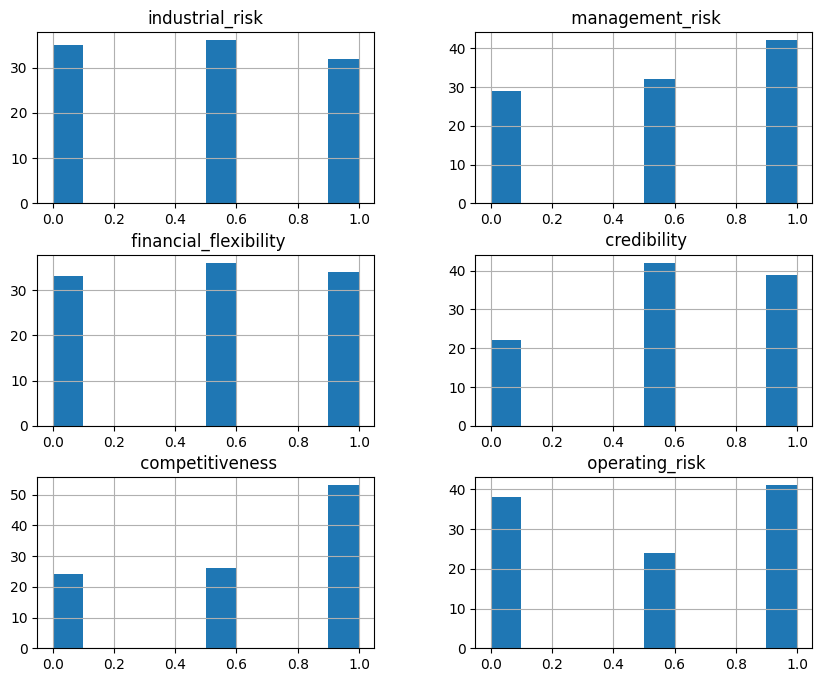

In [411]:
plt.tight_layout()
data.hist(figsize=(10, 8))


In [412]:
data['class'].unique()


array(['bankruptcy', 'non-bankruptcy'], dtype=object)

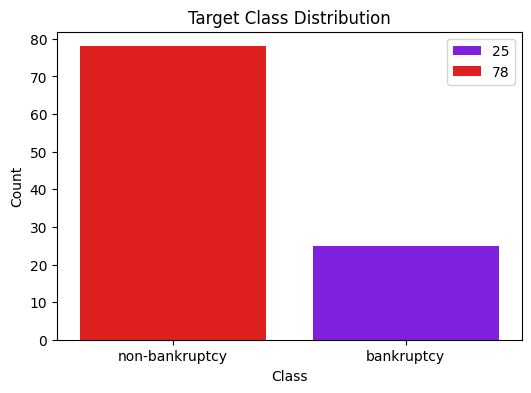

In [413]:
# Count the distribution of the target variable

class_distribution = data['class'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, hue=class_distribution.values, palette='rainbow')
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


<Axes: >

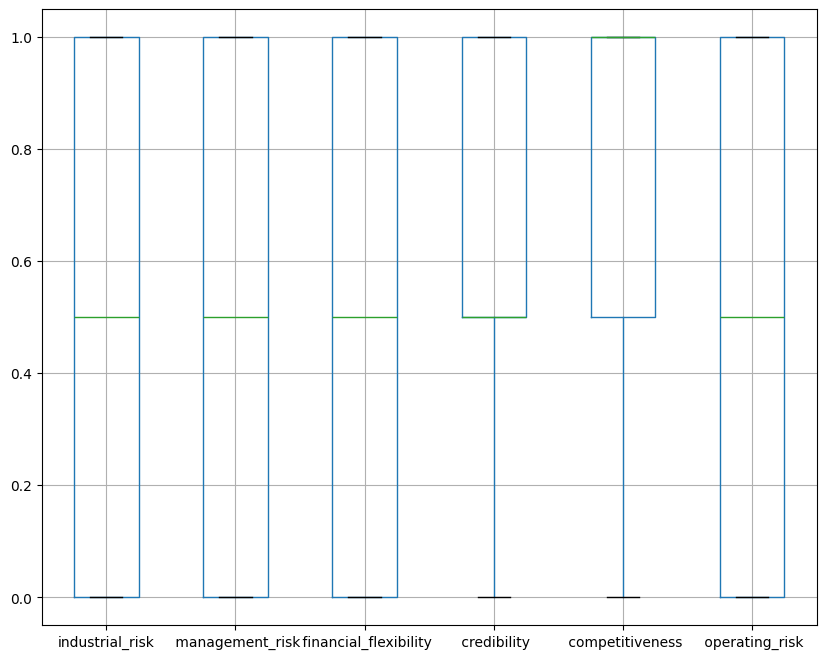

In [414]:
data.boxplot(figsize=(10, 8))


In [415]:
# Ensure correct column names (strip leading/trailing spaces)
data.columns = data.columns.str.strip()


In [416]:

# Chart 1: Scatter plot of industrial_risk vs management_risk
fig1 = px.scatter(data, x='industrial_risk', y='management_risk', color='class',title="Industrial Risk vs Management Risk")
fig1.show()


In [417]:
# Chart 2: Box plot for industrial_risk grouped by class
fig2 = px.box(data, x='class', y='industrial_risk', color='class',title="Box Plot of Industrial Risk by Class")
fig2.show()


In [418]:

# Chart 3: Histogram of credibility
fig3 = px.histogram(data, x='credibility', color='class', barmode='overlay',
                    title="Histogram of Credibility")
fig3.show()


In [419]:
# Chart 4: Heatmap of correlation between features

corr = data.drop(columns="class").corr()
corr_values = corr.values

fig = go.Figure(data=go.Heatmap(
        z=corr_values,
        x=corr.columns,
        y=corr.columns,
        colorscale='Viridis',
        showscale=True,
        reversescale=False,
        text=corr_values,
        texttemplate='%{text:.2f}'
    ))

fig.update_layout(
    title='Correlation Matrix',
    xaxis_title='',
    yaxis_title='',
    width=800,
    height=800,
    margin=dict(t=50, l=50, r=50, b=50)
)

fig.show()


In [420]:
# Chart 5: Line chart of industrial_risk and operating_risk
fig5 = px.line(data, x=data.index, y=['industrial_risk', 'operating_risk'], 
               title="Line Chart of Industrial Risk and Operating Risk")
fig5.show()


In [421]:
# Chart 6: Pairplot of all numerical features
fig6 = px.scatter_matrix(data, dimensions=['industrial_risk', 'management_risk', 
                                           'financial_flexibility', 'credibility', 
                                           'competitiveness', 'operating_risk'],
                         color='class', title="Scatter Matrix of Features")
fig6.show()


In [422]:
# Chart 7: Pie chart of class distribution
fig7 = px.pie(data, names='class', title="Class Distribution")
fig7.show()


In [423]:
# Chart 8: Violin plot of financial_flexibility grouped by class
fig8 = px.violin(data, y='financial_flexibility', x='class', color='class',
                 box=True, points='all', title="Violin Plot of Financial Flexibility by Class")
fig8.show()


In [424]:
# Chart 9: Bar chart of average competitiveness by class
avg_competitiveness = data.groupby('class')['competitiveness'].mean().reset_index()
fig9 = px.bar(avg_competitiveness, x='class', y='competitiveness', color='class',
              title="Average Competitiveness by Class")
fig9.show()


In [425]:
# Chart 10: Density contour plot of industrial_risk and credibility
fig10 = px.density_contour(data, x='industrial_risk', y='credibility', color='class',
                           title="Density Contour of Industrial Risk and Credibility")
fig10.show()


In [426]:
# Chart 11: Treemap of class distribution
fig11 = px.treemap(data, path=['class'], values='industrial_risk',
                   title="Treemap of Class Distribution by Industrial Risk")
fig11.show()


In [427]:
# Chart 12: Sunburst chart of class by competitiveness
fig12 = px.sunburst(data, path=['class', 'competitiveness'], values='operating_risk',
                    title="Sunburst Chart of Class by Competitiveness and Operating Risk")
fig12.show()


In [428]:
data 
label_encoder = LabelEncoder()
target_label_encoded = label_encoder.fit_transform(data["class"])


In [429]:
# Chart 13: Parallel coordinates plot for feature relationships
fig13 = px.parallel_coordinates(data, color= target_label_encoded,
                                dimensions=['industrial_risk', 'management_risk', 
                                            'financial_flexibility', 'credibility', 
                                            'competitiveness', 'operating_risk'],
                                color_continuous_scale=px.colors.diverging.Tealrose,
                                title="Parallel Coordinates Plot of Features")
fig13.show()


In [430]:
# Chart 14: Polar chart for average risks per class
import plotly.express as px

# Compute the average values for features grouped by class
avg_data = data.groupby('class')[['industrial_risk', 'management_risk', 'operating_risk']].mean().reset_index()

# Melt the data for compatibility with polar charts
avg_data_melted = avg_data.melt(id_vars='class', var_name='Risk Type', value_name='Risk Level')

# Create the polar chart
fig14 = px.line_polar(
    avg_data_melted,
    r='Risk Level',
    theta='Risk Type',
    color='class',  # Use class as the color for different lines
    line_close=True,
    title="Polar Chart of Average Risks per Class"
)

fig14.show()


In [431]:
# Chart 15: Bubble chart for industrial_risk vs competitiveness
fig15 = px.scatter(data, x='industrial_risk', y='competitiveness', size='operating_risk', 
                   color='class', title="Bubble Chart of Industrial Risk vs Competitiveness",
                   hover_data=['financial_flexibility', 'credibility'])
fig15.show()


### **6. Feature Selection & Engineering**
- Feature Importance: Use models (e.g., Random Forest) to evaluate feature importance.
- Remove Unimportant Features: Drop features that don't add value or have little importance.
- Correlation Check: Remove highly correlated features to avoid multicollinearity.

In [432]:
# #Feature Engineering

# # Load dataset (replace 'your_file.csv' with the actual file path)
# bankruptcy_data = data` is a comment in the code snippet provided. It is indicating that the variable `bankruptcy_data` is being assigned the value of a dataset named `data`. However, in this context, it seems like it is a placeholder comment and not actual code, as there is no assignment or loading of a dataset happening in the code snippet.
# bankruptcy_data = data
# # Create new features
# # Total Risk Score: Sum of all risk-related features
# bankruptcy_data['total_risk'] = (
#     bankruptcy_data['industrial_risk'] +
#     bankruptcy_data['management_risk'] +
#     bankruptcy_data['operating_risk']
# )

# # Flexibility to Risk Ratio: Ratio of financial flexibility to total risk
# epsilon = 1e-6  # Small value to avoid division by zero
# bankruptcy_data['flexibility_to_risk'] = (
#     bankruptcy_data['financial_flexibility'] / (bankruptcy_data['total_risk'] + epsilon)
# )

# # Risk Credibility Gap: Difference between total risk and credibility
# bankruptcy_data['risk_credibility_gap'] = (
#     bankruptcy_data['total_risk'] - bankruptcy_data['credibility']
# )

# # Competitive Risk Score: Product of competitiveness and operating risk
# bankruptcy_data['competitive_risk'] = (
#     bankruptcy_data['competitiveness'] * bankruptcy_data['operating_risk']
# )

# # Save the engineered dataset to a new file
# bankruptcy_data.head()


### **7. Split the Data**
- Split the data into training and testing sets to evaluate model performance properly.

In [433]:
# Preprocessing
# Separate features and target variable
X = data.drop(columns=['class'])
y = data['class']


In [434]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [435]:
y_encoded


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [436]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


### **8. Model Training**
- Train a Model: Choose an appropriate model based on the problem type (e.g., Random Forest for classification).

In [437]:
# Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [438]:
from sklearn.linear_model import LogisticRegression

# Model Training: Initial Random Forest
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
best_model = log_reg_model


### **9. Model Evaluation**
- Make Predictions: Use the test set to evaluate model performance.
- Metrics: Evaluate the model using accuracy, confusion matrix, precision, recall, and F1-score.
- Visualization: Visualize the confusion matrix and other evaluation metrics.

In [439]:
X_test


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
129,0.5,0.5,0.5,0.5,1.0,0.5
164,0.5,0.0,0.5,0.5,0.5,0.0
165,1.0,0.0,0.0,1.0,1.0,0.5
121,1.0,1.0,0.5,1.0,0.5,1.0
170,0.5,1.0,0.0,1.0,1.0,0.5
154,0.5,0.0,1.0,1.0,1.0,1.0
162,0.5,0.5,0.0,1.0,1.0,0.0
149,0.5,1.0,1.0,0.5,1.0,1.0
6,1.0,1.0,0.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.5


In [440]:
# # Given list
data_to_scale = [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]

# # Scale the data
# scaled_data = scaler.transform(data_to_scale)
# scaled_data	

log_reg_model.predict(data_to_scale)


C:\Users\Yogesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([1])

Initial Model Accuracy: 1.0

Initial Model Classification Report:

                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00         5
non-bankruptcy       1.00      1.00      1.00        16

      accuracy                           1.00        21
     macro avg       1.00      1.00      1.00        21
  weighted avg       1.00      1.00      1.00        21



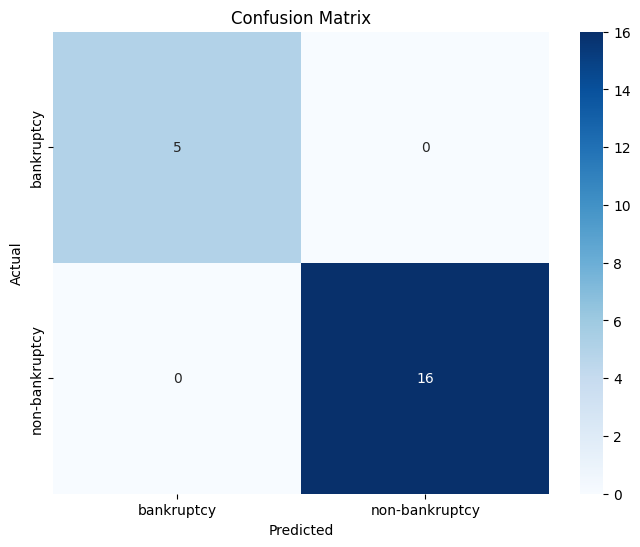

In [441]:
# Evaluate initial model
y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Initial Model Accuracy:", accuracy)

# Classification report and confusion matrix
print("\nInitial Model Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [442]:
X_train.iloc[0]


industrial_risk          1.0
management_risk          0.5
financial_flexibility    1.0
credibility              0.5
competitiveness          0.0
operating_risk           0.0
Name: 72, dtype: float64

In [443]:
y_test


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [444]:
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

### **10. Model Interpretation & Visualization**
   - **Feature Importance**: Show which features are most important for the model.
   - **Plot ROC Curve**: For classification tasks, plotting the ROC curve can help assess model performance.


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Yogesh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\Yogesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



<Figure size 800x600 with 0 Axes>

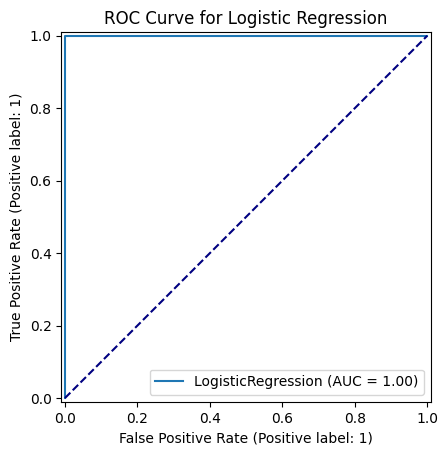

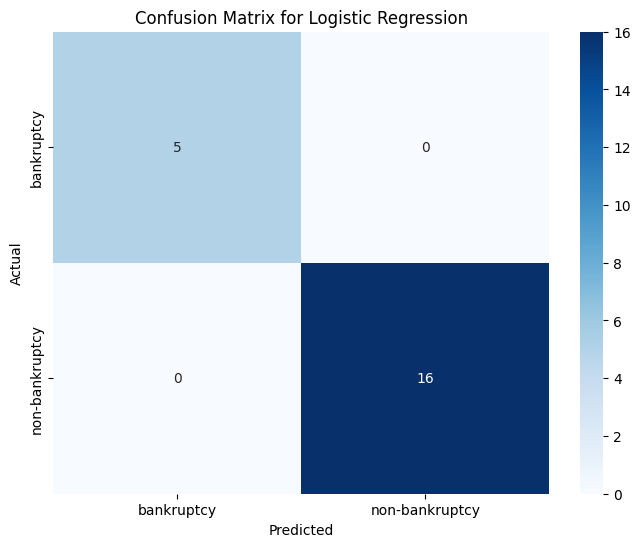

In [445]:
%pip install scikit-learn

from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Plot ROC Curve
plt.figure(figsize=(8, 6))
roc_disp = RocCurveDisplay.from_estimator(best_model, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Line of no-discrimination
plt.title('ROC Curve for Logistic Regression')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### **11. Model Saving**
- Save the trained model for future predictions without retraining.

In [448]:
model_path = 'best_lr_model.pkl'
joblib.dump(log_reg_model, model_path)
print(f"Best model saved to {model_path}")


Best model saved to best_lr_model.pkl


### **12. Conclusion**

### **Conclusion on the Performance of the Model**

Based on the results from the classification report, the model has shown **exceptional performance** with perfect accuracy (1.0) and flawless precision, recall, and F1-score values for both the **bankruptcy** and **non-bankruptcy** classes. Here’s a detailed summary of the model's performance:

#### **Key Metrics:**
- **Accuracy**: The model achieved 100% accuracy on the test dataset, meaning all predictions were correct. It correctly identified all bankruptcy and non-bankruptcy instances.
- **Precision, Recall, and F1-Score**: The model's precision, recall, and F1-score are all 1.00 for both classes, indicating that:
  - Every predicted bankruptcy was indeed a bankruptcy (precision = 1.00).
  - Every actual bankruptcy was correctly identified (recall = 1.00).
  - The harmonic mean of precision and recall (F1-score) is also 1.00 for both classes, confirming balanced and perfect performance.

- **Macro Average and Weighted Average**: Both averages are 1.00, indicating that the model performed equally well across both classes, irrespective of their support (number of instances per class).

#### **Strengths of the Model:**
1. **Perfect Performance**: The model correctly predicted all bankruptcy and non-bankruptcy cases, achieving perfect scores across all metrics.
2. **Balanced Class Performance**: The model showed an equal ability to predict both classes (bankruptcy and non-bankruptcy) with no bias towards either class, as indicated by the balanced precision, recall, and F1-scores.

#### **Potential Concerns:**
1. **Risk of Overfitting**:
   - Although the model performs flawlessly on this dataset, the perfect accuracy could be a sign of overfitting, especially if the training and testing data are too similar or if the dataset is small. Overfitting would result in the model not generalizing well to new, unseen data.
   
2. **Dataset Size and Diversity**:
   - The dataset used for testing contains only 50 samples (21 bankruptcy and 29 non-bankruptcy cases), which is a relatively small sample. A model's performance can appear overly optimistic on small or non-representative datasets. In real-world scenarios, more diverse and larger datasets are required to validate the model’s robustness.

#### **Recommendations for Further Testing:**
1. **Cross-Validation**:
   - Perform **cross-validation** (e.g., 5-fold or 10-fold) to assess how well the model generalizes across different subsets of the data. This will provide a better indication of its true performance on unseen data.
   
2. **Test on Real-World Data**:
   - To ensure the model’s reliability, test it on a **larger and more diverse dataset**. This will help confirm if the model can maintain its perfect performance or if adjustments are needed.

3. **Hyperparameter Tuning**:
   - While the Logistic Regression model has performed well, hyperparameter optimization using **GridSearchCV** or **RandomizedSearchCV** could help refine the model further and ensure it performs well across different data subsets.

4. **Model Robustness**:
   - To ensure the model is not overfitting, evaluate it on **unseen data** or perform stress tests (e.g., noisy data, missing values) to assess its robustness and generalizability.

---

### **Final Conclusion:**
The **Logistic Regression model** performed exceptionally well on the bankruptcy prediction task with **100% accuracy**. However, given the small dataset size and the potential for overfitting, further validation through **cross-validation** and testing on **larger, more diverse datasets** is recommended to confirm its robustness and generalization to real-world data. If the model continues to show consistent performance across multiple datasets, it can be considered reliable for predicting bankruptcy risk.